In [1]:
#Do sanity checks
#Retrain agents with different seeds

import rlcard
from rlcard import models
from rlcard.agents import NFSPAgent, RandomAgent
from rlcard.utils import (
    get_device,
    set_seed,
    tournament,
    reorganize,
    Logger,
    plot_curve,
)
import numpy as np

In [2]:
import torch

In [3]:
!python run_rl_multiagent_collaborative.py
# !python run_rl_multiagent.py

--> Running on the GPU
INFO - Step 1055250, sl-loss: 0.19770857691764832
----------------------------------------
  episode      |  0
  reward       |  [-0.201, 0.0925, 0.1085]
----------------------------------------
INFO - Step 1056100, rl-loss: 23.2323780059814453
INFO - Copied model parameters to target network.
INFO - Step 1057100, rl-loss: 118.374710083007818
INFO - Copied model parameters to target network.
INFO - Step 1058100, rl-loss: 110.858619689941486
INFO - Copied model parameters to target network.
INFO - Step 1059100, rl-loss: 139.613845825195392
INFO - Copied model parameters to target network.
INFO - Step 1060100, rl-loss: 44.6671447753906251
INFO - Copied model parameters to target network.
INFO - Step 1060899, sl-loss: 0.22406134009361267
----------------------------------------
  episode      |  500
  reward       |  [-0.21275, 0.693, -0.48025]
----------------------------------------
INFO - Step 1061100, rl-loss: 62.3564491271972662
INFO - Copied model parameters t

In [8]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

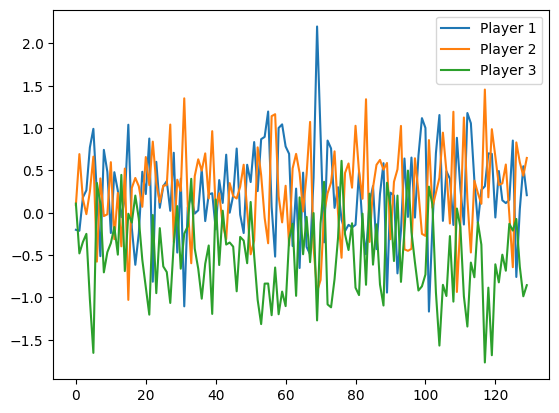

In [4]:
df = pd.read_csv(r'./checkpoint_collab/performance.csv')
# df2 = pd.read_csv(r'.\checkpoint_collab\performancev1.csv')
df['reward'] = df['reward'].apply(ast.literal_eval)
# df2['reward'] = df2['reward'].apply(ast.literal_eval)
# plt.figure(figsize=(20,5))
plt.plot(df['reward'].to_list())
plt.legend(("Player 1", "Player 2", "Player 3"))

In [14]:
df

,episode,reward
0,0,"[-0.201, 0.0925, 0.1085]"
1,500,"[-0.21275, 0.693, -0.48025]"
2,1000,"[0.18175, 0.164, -0.34575]"
3,1500,"[0.2655, -0.0165, -0.249]"
4,2000,"[0.772, 0.251, -1.023]"
...,...,...
125,62500,"[0.853, -0.64275, -0.21025]"
126,63000,"[-0.75825, 0.831, -0.07275]"
127,63500,"[0.042, 0.596, -0.638]"
128,64000,"[0.5495, 0.437, -0.9865]"


In [10]:
def numpy_ewma_vectorized_v2(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha
    n = data.shape[0]

    pows = alpha_rev**(np.arange(n+1))

    scale_arr = 1/pows[:-1]
    offset = data[0]*pows[1:]
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

/tmp/ipykernel_4140393/2234938446.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


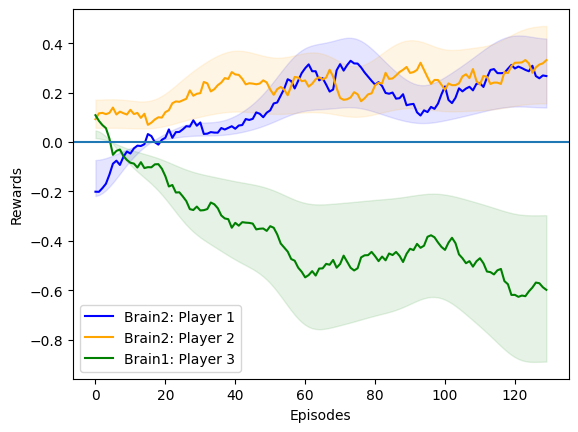

In [34]:
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d
df = pd.read_csv(r'./checkpoint_collab/performance.csv')
# df2 = pd.read_csv(r'.\checkpoint_collab\performancev1.csv')
df['reward'] = df['reward'].apply(ast.literal_eval)
df['player1'] = numpy_ewma_vectorized_v2(np.array(df['reward'].tolist())[:, 0], 50)
df['player2'] = numpy_ewma_vectorized_v2(np.array(df['reward'].tolist())[:, 1], 50)
df['player3'] = numpy_ewma_vectorized_v2(np.array(df['reward'].tolist())[:, 2], 50)

# df2['reward'] = df2['reward'].apply(ast.literal_eval)
# plt.figure(figsize=(20,5))
fig = plt.figure()
ax = plt.gca()

plt.plot(df['player1'], color="blue", label="Brain2: Player 1")
arr = df['player1'].to_numpy()
upper_err = gaussian_filter1d(arr + (arr/2), sigma=5)
lower_err = gaussian_filter1d(arr - (arr/2), sigma=5)

y_pos = np.arange(arr.shape[0])
ax.fill_between(y_pos, upper_err, lower_err, color='blue', alpha=0.1)

plt.plot(df['player2'], color="orange", label="Brain2: Player 2")
arr = df['player2'].to_numpy()
upper_err = gaussian_filter1d(arr + (arr/2), sigma=5)
lower_err = gaussian_filter1d(arr - (arr/2), sigma=5)

y_pos = np.arange(arr.shape[0])
ax.fill_between(y_pos, upper_err, lower_err, color='orange', alpha=0.1)

plt.plot(df['player3'], color="green", label="Brain1: Player 3")
arr = df['player3'].to_numpy()
upper_err = gaussian_filter1d(arr + (arr/2), sigma=5)
lower_err = gaussian_filter1d(arr - (arr/2), sigma=5)

y_pos = np.arange(arr.shape[0])
ax.fill_between(y_pos, upper_err, lower_err, color='green', alpha=0.1)

plt.axhline(0)
plt.ylabel("Rewards")
plt.xlabel("Episodes")
# sns.lineplot(df, x='episode',y='player1')
# sns.lineplot(df, x='episode',y='player2')
# sns.lineplot(df, x='episode',y='player3')
plt.legend()

In [ ]:
asd

In [15]:
eval_env = rlcard.make(
    'limit-holdem',
    config={
        'game_num_players': 3,
    }
)

agent1 = torch.load(r'.\checkpoint_collab\5000_collab_nfsp_comp1.pth')
agent2 = torch.load(r'.\checkpoint_collab\5000_collab_nfsp_comp2.pth')
agent3 = torch.load(r'.\checkpoint_collab\5000_collab_nfsp_comp3.pth')

In [16]:
eval_env.set_agents([
  agent1,
  agent2,
  agent3
])

In [17]:
agent1

In [18]:
a = [0 for _ in range(eval_env.num_players)]
for i in range(1000):
  eval_env.reset()
  trajectories, payoffs = eval_env.run(is_training=False)
  for idx in range(eval_env.num_players):
    # print(f"Player {idx}: {env.game.get_state(idx)['my_chips']}")
    a[idx] += payoffs[idx]


In [19]:
a

[-795.0, -63.0, 858.0]

In [20]:
trajectories, payoffs = eval_env.run(is_training=False)
trajectories = reorganize(trajectories, payoffs)

In [28]:
eval_env.get_perfect_information()

{'chips': [28, 28, 28],
 'public_card': ['D8', 'CK', 'D5', 'S9', 'H3'],
 'hand_cards': [['SQ', 'S4'], ['H7', 'C5'], ['S2', 'SJ']],
 'current_player': 1,
 'legal_actions': ['raise', 'fold', 'check']}